In [7]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file(
    "c:\\Users\\User\\source\\repos\\parallel_prog\\x64\\Release\\matrix1.txt")
matrix2 = read_matrix_from_file(
    "c:\\Users\\User\\source\\repos\\parallel_prog\\x64\\Release\\matrix2.txt")
result_matrix_cpp = read_matrix_from_file(
    "c:\\Users\\User\\source\\repos\\parallel_prog\\x64\\Release\\result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [8]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("..\\x64\\Release\\stats_mpi8.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [ ]:
arr

In [ ]:
plot_intervals(sizes, intervals)

Процессор	Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz   2.40 GHz 4 ядра 8 логических процессоров

Оперативная память	16,0 ГБ (доступно: 15,8 ГБ)

Тип системы	64-разрядная операционная система, процессор x64


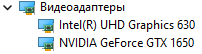

## OpenMP

Таблица значений для 1 ядра
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[1360, 679, 650, 635, 653, 652, 642, 652, 641,...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[1129, 1096, 1115, 1135, 1117, 1097, 1098, 119...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[1887, 2427, 1962, 2200, 2682, 2133, 2123, 214...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[3368, 2741, 3519, 3442, 3262, 3120, 3334, 356...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[4549, 4481, 4062, 4128, 4504, 4009, 4256, 408...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[6080, 6299, 6252, 6166, 6260, 6521, 7317, 712...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[7779, 7779, 7805, 7768, 7533, 8278, 8361, 796...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[10671, 12228, 11380, 11546, 11936, 12880, 122...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[16410, 16668, 16137, 16544, 16803, 16373, 167...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[18119, 17766, 18880, 18784, 18438, 18488, 193...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[27403, 26949, 25430, 26318, 29689, 28260, 262...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[29570, 29175, 29199, 30640, 30860, 30196, 308...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[39141, 41415, 46400, 43272, 63091, 40185, 375...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[49715, 47506, 47403, 48227, 46422, 45736, 459...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[56772, 54655, 59255, 57541, 56583, 58578, 574...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[73368, 71279, 71584, 69897, 68054, 66329, 681...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[78669, 79877, 80299, 81536, 83182, 83356, 829...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[92226, 92335, 93954, 96166, 96837, 96543, 929...</td>
    </tr>
  </tbody>
</table>
</div>

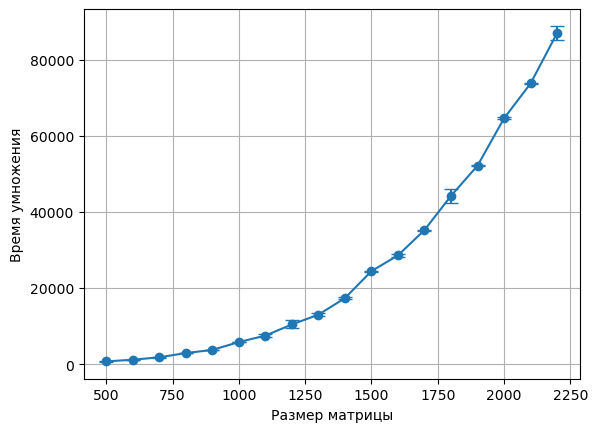

Таблица значений для 2 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[1043, 493, 412, 392, 381, 405, 431, 485, 435,...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[665, 717, 760, 879, 761, 799, 794, 740, 685, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[1457, 1185, 1189, 1126, 1186, 1054, 1091, 109...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[1592, 1493, 1599, 1673, 1666, 1684, 1596, 163...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[2151, 2164, 2097, 2172, 2341, 2672, 2801, 220...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[3592, 3927, 3805, 4122, 3761, 3612, 3634, 364...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[4985, 4285, 4344, 4682, 4841, 4957, 5853, 509...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[5595, 5931, 5747, 5878, 5702, 5760, 5691, 594...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[7867, 7473, 7631, 7707, 7425, 7755, 8045, 758...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[10715, 12346, 10994, 10044, 10391, 9837, 1005...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[14565, 14722, 14223, 14282, 14867, 15697, 161...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[16603, 16203, 16987, 16685, 16196, 17087, 171...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[19984, 19619, 24339, 23055, 23481, 34930, 220...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[23858, 24040, 23912, 23626, 23881, 23687, 243...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[28670, 28276, 28636, 28588, 30309, 31518, 314...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[34971, 38304, 37855, 38426, 37531, 37322, 373...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[44480, 41499, 42875, 41812, 41403, 40176, 399...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[46160, 46653, 46507, 46713, 46058, 46678, 467...</td>
    </tr>
  </tbody>
</table>
</div>

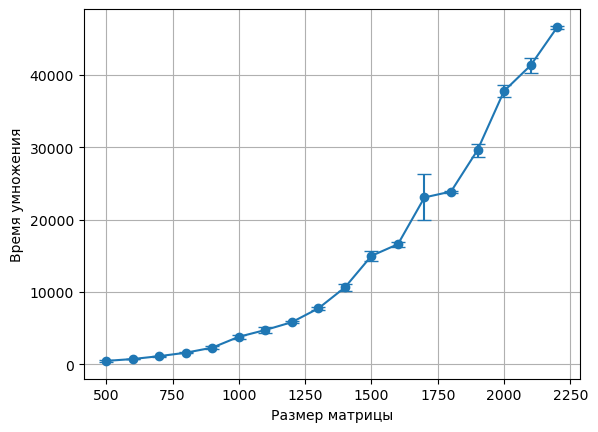

Таблица значений для 4 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[586, 378, 344, 349, 343, 362, 372, 338, 320, ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[533, 527, 557, 513, 562, 540, 531, 538, 540, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[830, 838, 826, 862, 899, 902, 841, 869, 824, ...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[1206, 1078, 1212, 1144, 1174, 1196, 1156, 111...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[1565, 1518, 1599, 1676, 1564, 2036, 1859, 199...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[6360, 4764, 4628, 3979, 3693, 2641, 3389, 402...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[3067, 3522, 3412, 3429, 3509, 3041, 3410, 315...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[3896, 4456, 4291, 4394, 3884, 4484, 4921, 472...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[5850, 5383, 5968, 5755, 5637, 5923, 5519, 526...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[7044, 7298, 7504, 7021, 7413, 6919, 7425, 696...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[9377, 8844, 8345, 8330, 8534, 8557, 8294, 880...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[10584, 12596, 11976, 12119, 12249, 12675, 122...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[13750, 14062, 13438, 13201, 15154, 14199, 176...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[16580, 16981, 15659, 17565, 17054, 15913, 166...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[20472, 20032, 19983, 21312, 18953, 19851, 197...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[22850, 23798, 28500, 26434, 24675, 23906, 242...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[28793, 27385, 27920, 26440, 26396, 26073, 286...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[32676, 32644, 33853, 32019, 31694, 30494, 317...</td>
    </tr>
  </tbody>
</table>
</div>

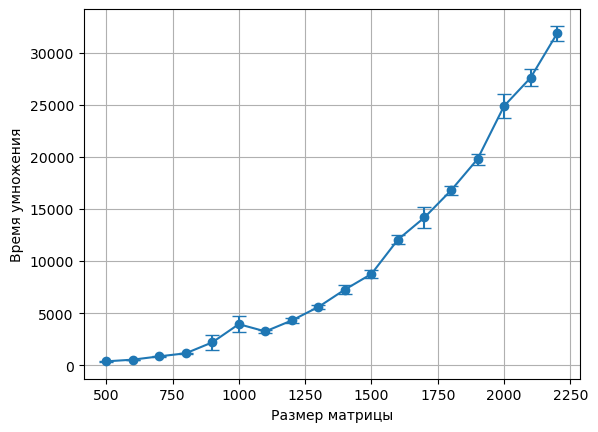

Таблица значений для 8 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[953, 315, 474, 498, 345, 438, 529, 358, 441, ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[571, 645, 614, 642, 712, 699, 668, 695, 800, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[946, 1002, 851, 1077, 825, 826, 1103, 844, 82...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[1507, 1765, 1352, 1186, 1500, 1406, 1404, 131...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[1616, 2002, 2130, 1893, 1814, 1742, 1685, 154...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[2483, 2426, 2401, 2797, 2578, 2719, 2423, 238...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[3448, 4139, 3201, 3029, 3016, 3129, 3255, 323...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[4606, 4683, 4632, 3893, 4408, 4196, 4373, 431...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[5283, 5218, 5127, 5775, 7175, 5458, 5561, 598...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[6808, 7390, 6812, 6501, 6823, 6823, 6570, 662...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[7537, 7256, 7766, 7819, 7535, 8143, 7798, 791...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[9567, 9753, 10481, 9265, 10207, 10225, 9389, ...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[12152, 11798, 11782, 11004, 11096, 10425, 107...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[12620, 12912, 12799, 12629, 12839, 12694, 131...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[15299, 16876, 15501, 14802, 14804, 14742, 146...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[17757, 17841, 17275, 18038, 17612, 17452, 176...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[20527, 21067, 20073, 20209, 20752, 20112, 204...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[23251, 23072, 23144, 23247, 23203, 23511, 231...</td>
    </tr>
  </tbody>
</table>
</div>

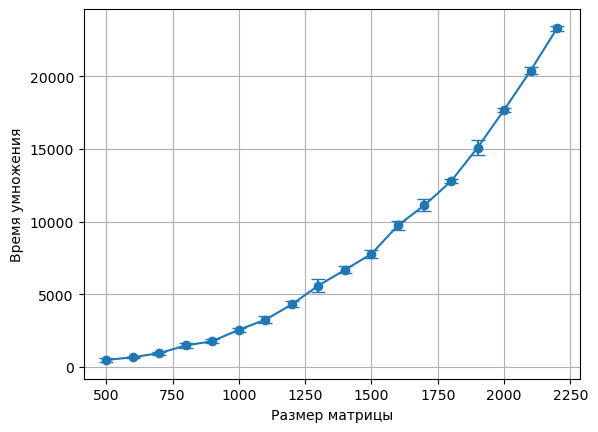

Вывод: из графиков выше видно, что при увеличении количества ядер в 2 раза, среднее время выполнения умножения уменьшается в 2 раза, по сравнению с 1 ядром. При увеличении кол. ядер еще в 2 раза время выполнения также уменьшается в 3 раза. Т.о. 2^(n-1) количества ядер уменьшает время по закону 1/n.

## MPI

Таблица значений для 2 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[382, 352, 325, 362, 328, 386, 365, 353, 344, ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[549, 576, 576, 560, 600, 583, 563, 567, 581, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[934, 939, 948, 999, 1197, 1192, 1086, 1315, 9...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[1297, 1279, 1285, 1292, 1229, 1422, 1430, 154...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[2137, 1954, 1995, 1959, 1940, 1878, 1825, 184...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[2539, 2749, 2803, 3000, 3135, 3194, 3103, 284...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[4077, 4129, 4053, 4071, 3988, 4087, 3907, 401...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[4401, 4193, 4412, 4305, 5403, 5561, 5327, 418...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[6284, 6226, 6399, 6764, 6485, 6280, 6188, 624...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[7300, 7007, 7216, 7171, 7228, 7237, 7193, 723...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[9999, 10112, 10122, 10117, 9990, 10037, 10241...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[13646, 14212, 13399, 13456, 13625, 13546, 134...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[16978, 28209, 20232, 19590, 18403, 17085, 172...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[21583, 21216, 20833, 20885, 21071, 20854, 211...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[27601, 28016, 27604, 27671, 27832, 27925, 280...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[28552, 28915, 28811, 28308, 28591, 28858, 292...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[37469, 37560, 37596, 37405, 46513, 37618, 376...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[41285, 41436, 41227, 41975, 41199, 41214, 414...</td>
    </tr>
  </tbody>
</table>
</div>


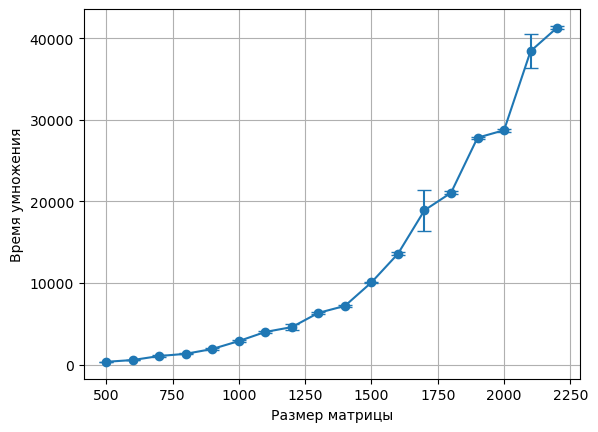

Таблица значений для 4 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[268, 293, 273, 260, 246, 287, 259, 249, 269, ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[442, 484, 445, 387, 486, 481, 442, 481, 416, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[659, 721, 631, 752, 650, 792, 645, 880, 709, ...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[1237, 1139, 952, 945, 932, 926, 935, 1015, 11...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[1755, 1771, 1907, 1626, 1811, 1937, 2030, 195...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[2695, 2931, 2684, 2071, 2131, 2182, 2570, 289...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[3902, 3123, 3130, 3415, 4126, 2980, 3710, 379...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[3615, 3589, 3284, 3337, 3567, 3873, 3413, 333...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[5055, 4618, 4902, 4505, 4553, 4681, 4743, 494...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[5990, 6277, 6059, 6694, 6906, 7358, 7318, 666...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[8735, 8744, 7456, 8733, 9045, 8584, 8121, 782...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[10889, 11392, 10910, 10180, 10290, 10607, 104...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[12868, 12398, 12379, 13519, 12441, 12782, 145...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[15785, 16733, 16232, 14843, 14481, 14349, 147...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[19025, 20642, 20471, 20151, 19704, 20104, 210...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[23700, 23256, 22516, 22067, 23688, 22076, 221...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[28505, 27737, 28621, 27041, 27484, 28397, 272...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[28917, 30139, 29620, 31560, 32590, 30481, 315...</td>
    </tr>
  </tbody>
</table>
</div>

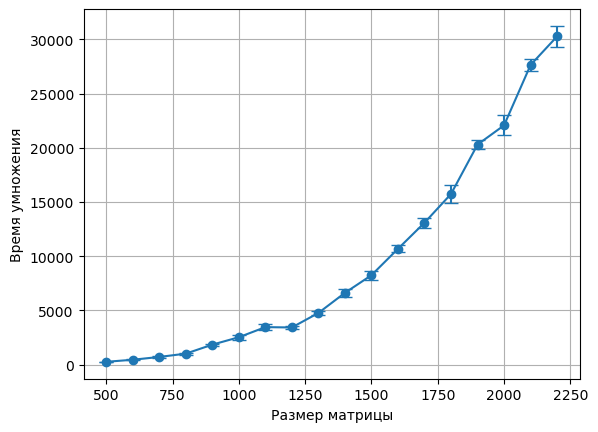

Таблица для 8 ядер
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sizes</th>
      <th>times</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>500</td>
      <td>[278, 315, 341, 389, 275, 290, 394, 379, 291, ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>600</td>
      <td>[479, 441, 512, 495, 593, 469, 562, 685, 568, ...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>700</td>
      <td>[720, 976, 797, 670, 928, 1089, 765, 953, 793,...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>800</td>
      <td>[966, 1011, 1033, 1132, 1146, 1236, 972, 985, ...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>900</td>
      <td>[1477, 1909, 1719, 1617, 1678, 1499, 1541, 203...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1000</td>
      <td>[2159, 2122, 2457, 2294, 2184, 2190, 2184, 240...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1100</td>
      <td>[3265, 3366, 3183, 3439, 3292, 3376, 3249, 333...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>1200</td>
      <td>[3681, 3804, 4105, 3690, 3479, 3864, 4082, 359...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1300</td>
      <td>[4884, 5069, 4935, 4941, 5071, 5474, 5281, 513...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1400</td>
      <td>[5857, 6016, 5945, 6135, 5878, 6081, 6047, 593...</td>
    </tr>
    <tr>
      <th>10</th>
      <td>1500</td>
      <td>[8099, 8015, 7662, 7651, 8261, 7692, 7826, 772...</td>
    </tr>
    <tr>
      <th>11</th>
      <td>1600</td>
      <td>[9711, 9617, 9881, 10776, 10179, 10292, 9277, ...</td>
    </tr>
    <tr>
      <th>12</th>
      <td>1700</td>
      <td>[13108, 11604, 12500, 11814, 11278, 12884, 169...</td>
    </tr>
    <tr>
      <th>13</th>
      <td>1800</td>
      <td>[13278, 14242, 12722, 13893, 14164, 12904, 131...</td>
    </tr>
    <tr>
      <th>14</th>
      <td>1900</td>
      <td>[17481, 16737, 16146, 16188, 15567, 14671, 161...</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2000</td>
      <td>[16987, 17420, 18316, 16472, 16433, 18638, 172...</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2100</td>
      <td>[21159, 21953, 22918, 23197, 20861, 20074, 204...</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2200</td>
      <td>[25214, 28211, 25315, 27108, 26099, 25023, 245...</td>
    </tr>
  </tbody>
</table>
</div>

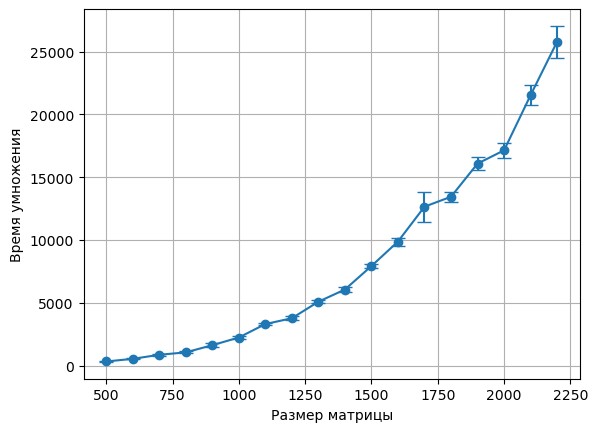

Вывод: для технологии MPI получились схожие результаты с OpenMP, но различие в небольших скачаках времени обработки для некоторых размерностей и неровные кривые графиков зависимости времени от размерности. 